In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.style.use('demo_style.mplstyle')

In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]


'672300'

In [3]:
#gpu sanity checks

tf.test.is_built_with_cuda()



True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')

In [6]:
#load our data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 

qall_data = np.concatenate((q003_data, q103_data), axis=0)

In [7]:
#load our encoded and pca data

encoded_all = np.load('encoded_all.npy')
img_pca = np.load('img_pca.npy')

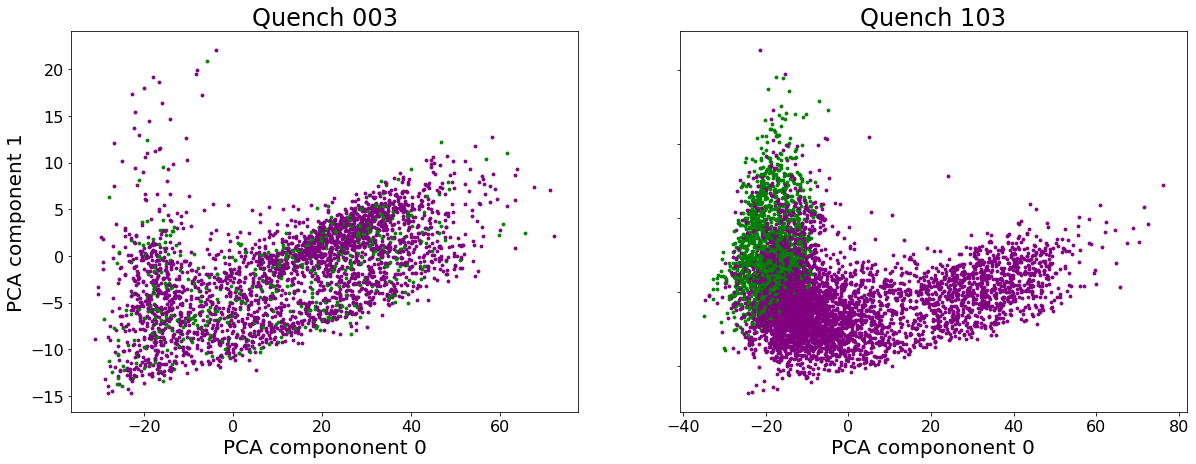

In [8]:
qall_labels = np.concatenate((q003_labels, q103_labels), axis=0)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])

msize = 8

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(qall_data.shape[0]):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

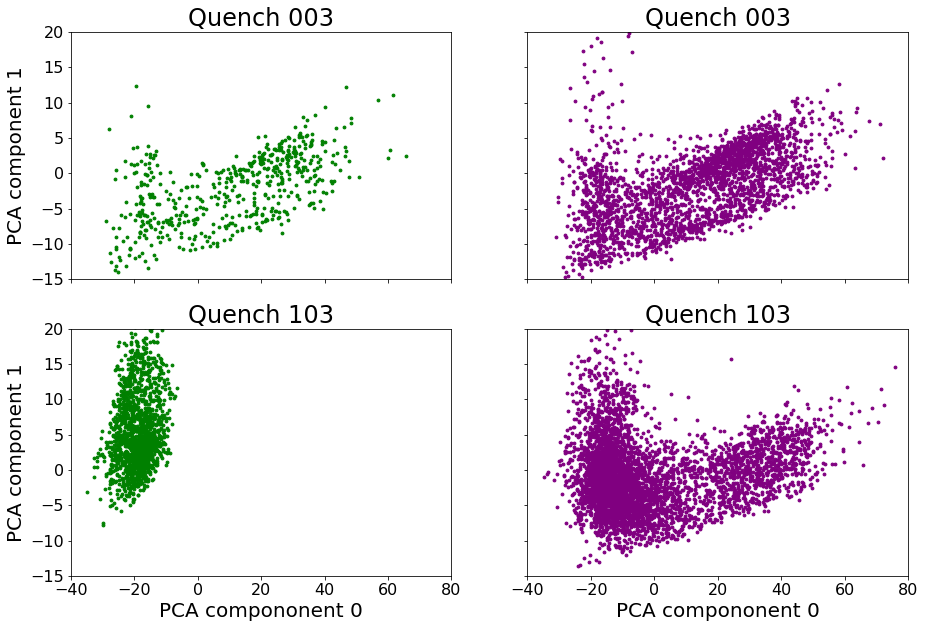

In [9]:
#make additoinal figure plotting green and purple separately

#make the same plot but show all quenches separately

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)        
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)        

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [10]:
#select and plot some spectrograms (3) from each region and with each label

#divide the PCA space into 3 regions-- left v, center v, right v

pad=5
num_images = 3

#left v
lx=-20
ly=5
leftvxmin = lx-pad 
leftvxmax = lx+pad
leftvymin = ly-pad 
leftvymax = ly+pad

#center v
cx=-15
cy=-5
centervxmin = cx-pad 
centervxmax = cx+pad
centervymin = cy-pad 
centervymax = cy+pad

#right v
rx=30
ry=0
rightvxmin = rx-pad 
rightvxmax = rx+pad
rightvymin = ry-pad 
rightvymax = ry+pad



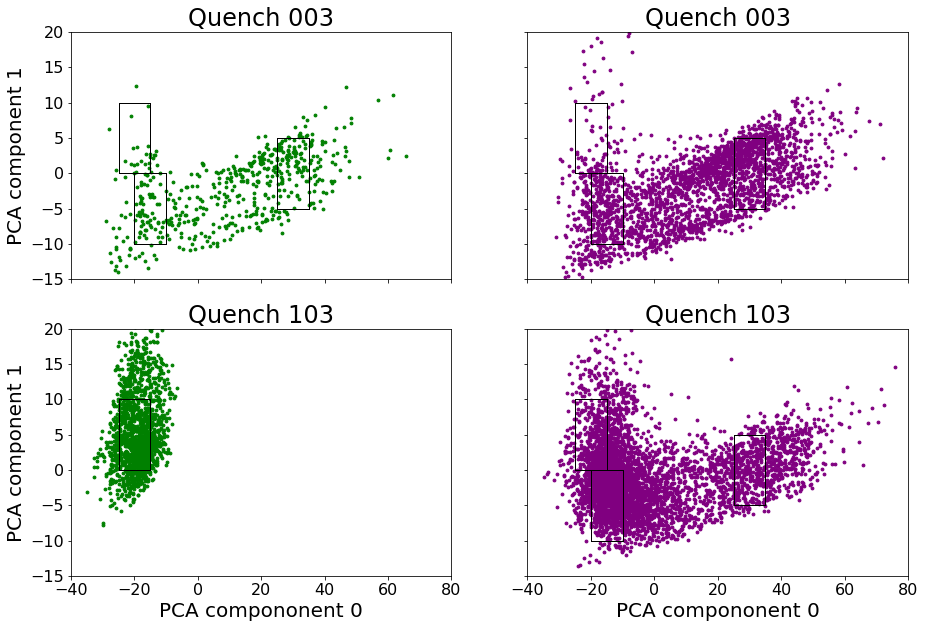

In [11]:
#draw boxes that show where our pca samples come from

import matplotlib.patches as patches

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
        axs[0, 0].add_patch(patches.Rectangle((leftvxmin, leftvymin), pad*2, pad*2, fill=False))
        axs[0, 0].add_patch(patches.Rectangle((centervxmin, centervymin), pad*2, pad*2, fill=False)) 
        axs[0, 0].add_patch(patches.Rectangle((rightvxmin, rightvymin), pad*2, pad*2, fill=False)) 
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
        axs[0, 1].add_patch(patches.Rectangle((leftvxmin, leftvymin), pad*2, pad*2, fill=False))
        axs[0, 1].add_patch(patches.Rectangle((centervxmin, centervymin), pad*2, pad*2, fill=False)) 
        axs[0, 1].add_patch(patches.Rectangle((rightvxmin, rightvymin), pad*2, pad*2, fill=False)) 
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)
        axs[1, 0].add_patch(patches.Rectangle((leftvxmin, leftvymin), pad*2, pad*2, fill=False))
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)
        axs[1, 1].add_patch(patches.Rectangle((leftvxmin, leftvymin), pad*2, pad*2, fill=False))
        axs[1, 1].add_patch(patches.Rectangle((centervxmin, centervymin), pad*2, pad*2, fill=False)) 
        axs[1, 1].add_patch(patches.Rectangle((rightvxmin, rightvymin), pad*2, pad*2, fill=False))         

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

q003_green_left
[123, 243, 294, 354, 614, 996, 1323, 1401, 1468, 1568, 1642, 1686, 2694, 2741, 2882, 3012, 3057, 3058]
These are the random images we chose to display:
[ 294 2741 1686]


<Figure size 2160x720 with 0 Axes>

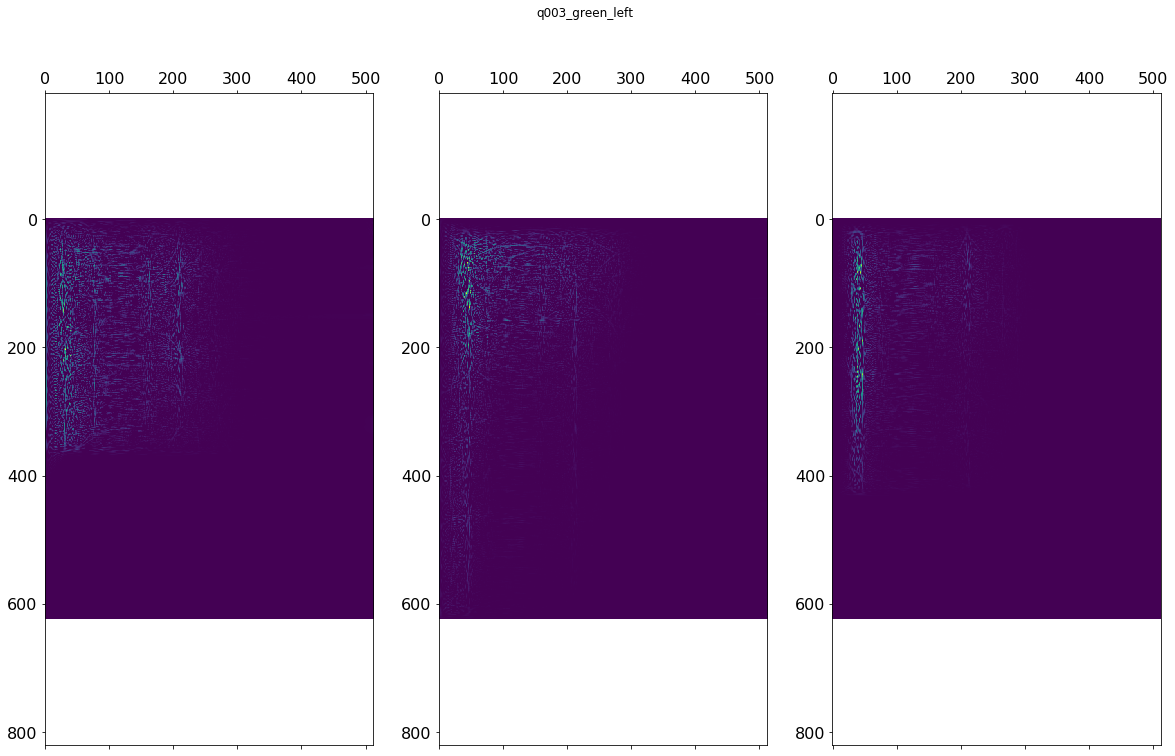

In [34]:
#quench 3, green, left

from matplotlib.pyplot import matshow

q003_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_green_left.append(i)
        
print("q003_green_left")        
print(q003_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_green_left')
plt.show()

q003_green_center
[12, 53, 101, 179, 181, 264, 266, 334, 519, 542, 572, 661, 700, 819, 827, 848, 881, 912, 956, 1017, 1049, 1113, 1278, 1412, 1480, 1497, 1583, 1603, 1609, 1670, 1674, 1675, 1697, 1710, 1716, 1789, 1818, 1858, 1881, 1889, 2158, 2231, 2264, 2291, 2298, 2302, 2313, 2367, 2477, 2531, 2539, 2617, 2700, 2704, 2809, 2853, 2874, 2891, 2924, 2944, 2972, 2976, 2991, 3038, 3048, 3120]
These are the random images we chose to display:
[1675 2477  181]


<Figure size 2160x720 with 0 Axes>

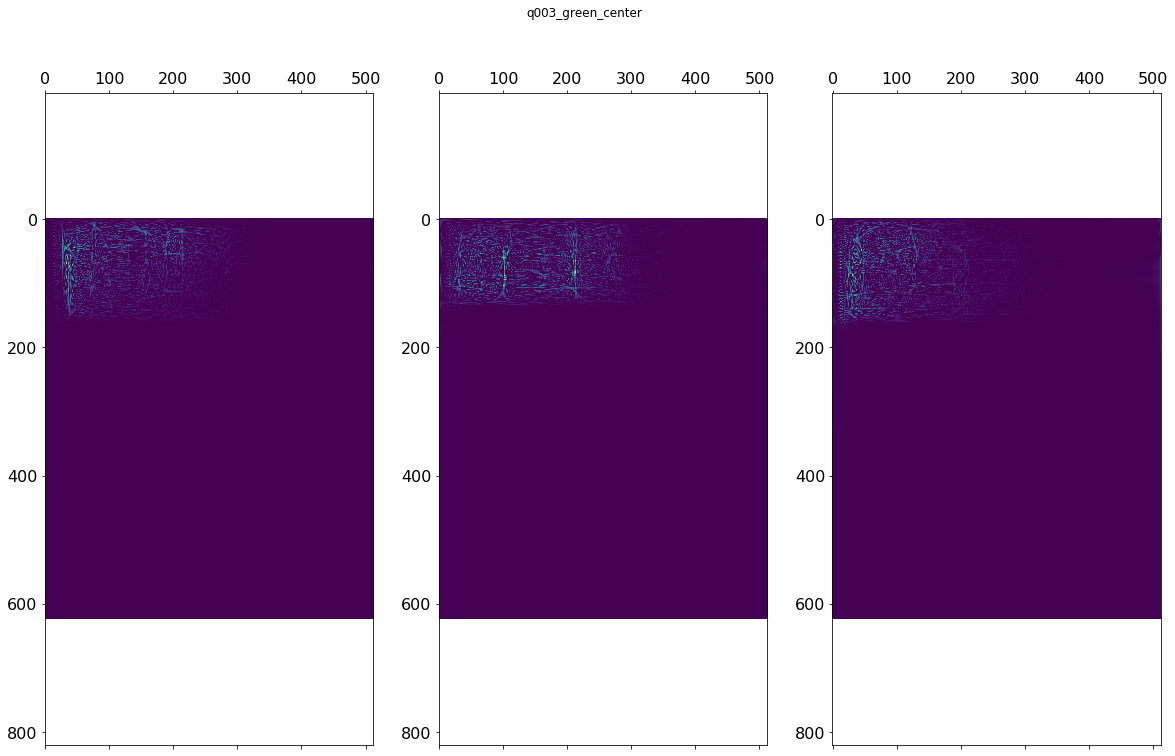

In [35]:
#quench 3, green, center

q003_green_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_green_center.append(i)
        
print("q003_green_center")        
print(q003_green_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_green_center')
plt.show()


q003_green_right
[28, 414, 442, 453, 472, 545, 563, 566, 794, 880, 905, 947, 973, 993, 1057, 1073, 1116, 1118, 1139, 1202, 1221, 1283, 1321, 1363, 1379, 1383, 1510, 1547, 1553, 1563, 1567, 1587, 1595, 1638, 1651, 1718, 1740, 1820, 1828, 1916, 1931, 1957, 1972, 2016, 2033, 2091, 2095, 2102, 2111, 2211, 2212, 2220, 2240, 2250, 2262, 2282, 2294, 2325, 2332, 2458, 2474, 2498, 2503, 2508, 2510, 2578, 2581, 2624, 2636, 2679, 2788, 2861, 2869, 2907, 2970, 3062, 3090, 3124, 3129, 3142, 3149]
These are the random images we chose to display:
[ 414 1957 3149]


<Figure size 2160x720 with 0 Axes>

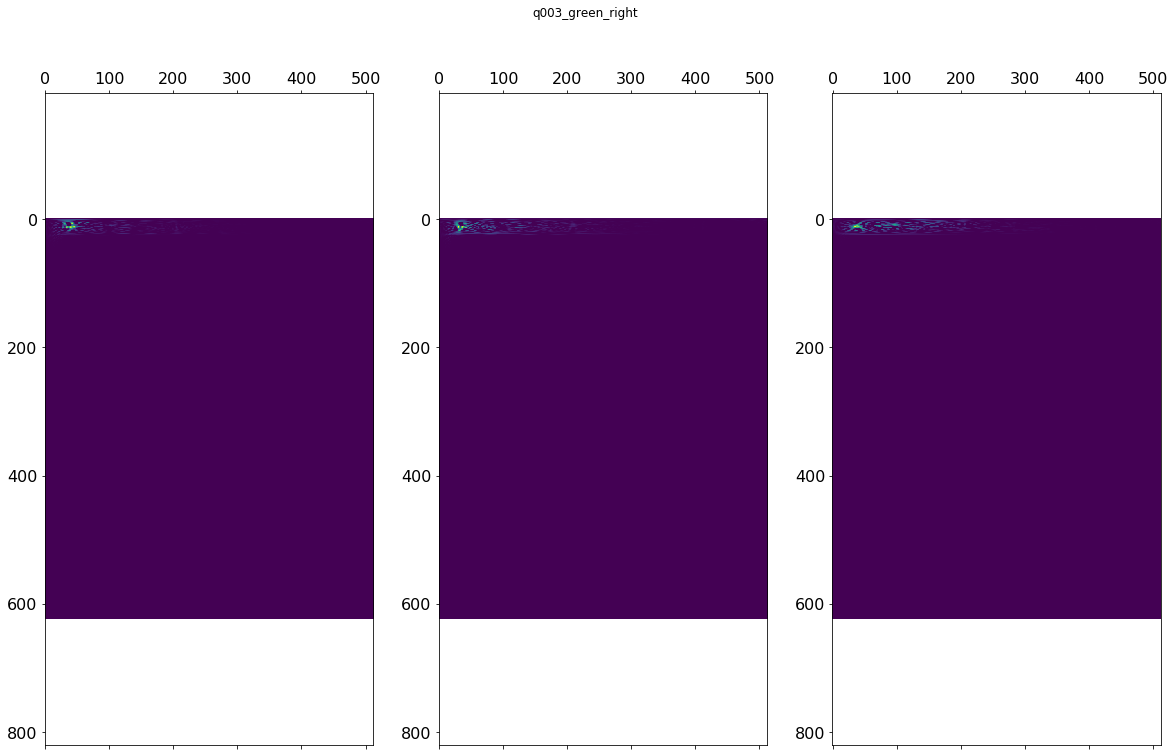

In [36]:
#quench 3, green, right

q003_green_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_green_right.append(i)
        
print("q003_green_right")        
print(q003_green_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_green_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_green_right')
plt.show()

q003_purple_left
[148, 185, 301, 310, 352, 364, 365, 419, 424, 479, 493, 503, 607, 642, 663, 737, 879, 1001, 1096, 1270, 1336, 1344, 1410, 1452, 1471, 1494, 1550, 1562, 1637, 1657, 1798, 1819, 1910, 1984, 1991, 2045, 2048, 2052, 2210, 2228, 2230, 2249, 2358, 2362, 2459, 2479, 2485, 2499, 2753, 2768, 2877, 2894, 3139, 3143, 3144]
These are the random images we chose to display:
[1096 1798  148]


<Figure size 2160x720 with 0 Axes>

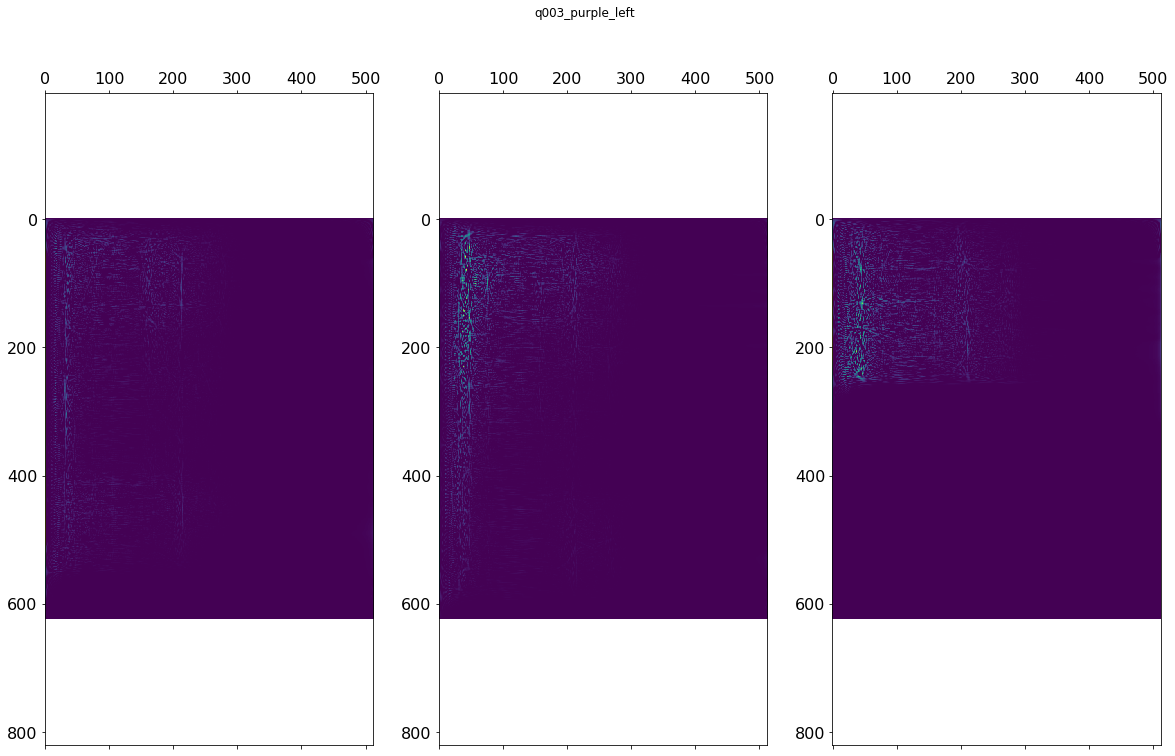

In [37]:
#quench 3, purple, left

q003_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q003_purple_left.append(i)
        
print("q003_purple_left")        
print(q003_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_purple_left')
plt.show()


q003_purple_center
[1, 2, 20, 26, 27, 65, 70, 78, 89, 116, 121, 140, 143, 150, 162, 173, 175, 180, 183, 192, 194, 200, 202, 205, 210, 211, 212, 231, 254, 258, 270, 287, 300, 312, 335, 341, 345, 356, 384, 386, 388, 410, 430, 443, 473, 481, 483, 507, 535, 537, 550, 556, 560, 591, 624, 652, 653, 658, 667, 686, 692, 704, 706, 716, 719, 740, 742, 749, 758, 767, 788, 795, 797, 831, 835, 870, 887, 888, 896, 898, 909, 913, 926, 965, 968, 979, 981, 985, 988, 1004, 1007, 1018, 1022, 1030, 1036, 1074, 1085, 1087, 1091, 1103, 1135, 1150, 1159, 1164, 1165, 1181, 1190, 1198, 1201, 1204, 1226, 1228, 1239, 1255, 1261, 1281, 1300, 1332, 1341, 1349, 1354, 1366, 1373, 1377, 1378, 1382, 1386, 1406, 1407, 1454, 1456, 1469, 1472, 1481, 1495, 1500, 1501, 1503, 1522, 1585, 1604, 1624, 1653, 1655, 1659, 1671, 1676, 1687, 1701, 1705, 1708, 1713, 1729, 1732, 1736, 1741, 1752, 1755, 1764, 1766, 1776, 1778, 1792, 1803, 1809, 1838, 1847, 1849, 1855, 1868, 1896, 1898, 1901, 1905, 1937, 1944, 1956, 1963, 1969, 1978, 

<Figure size 2160x720 with 0 Axes>

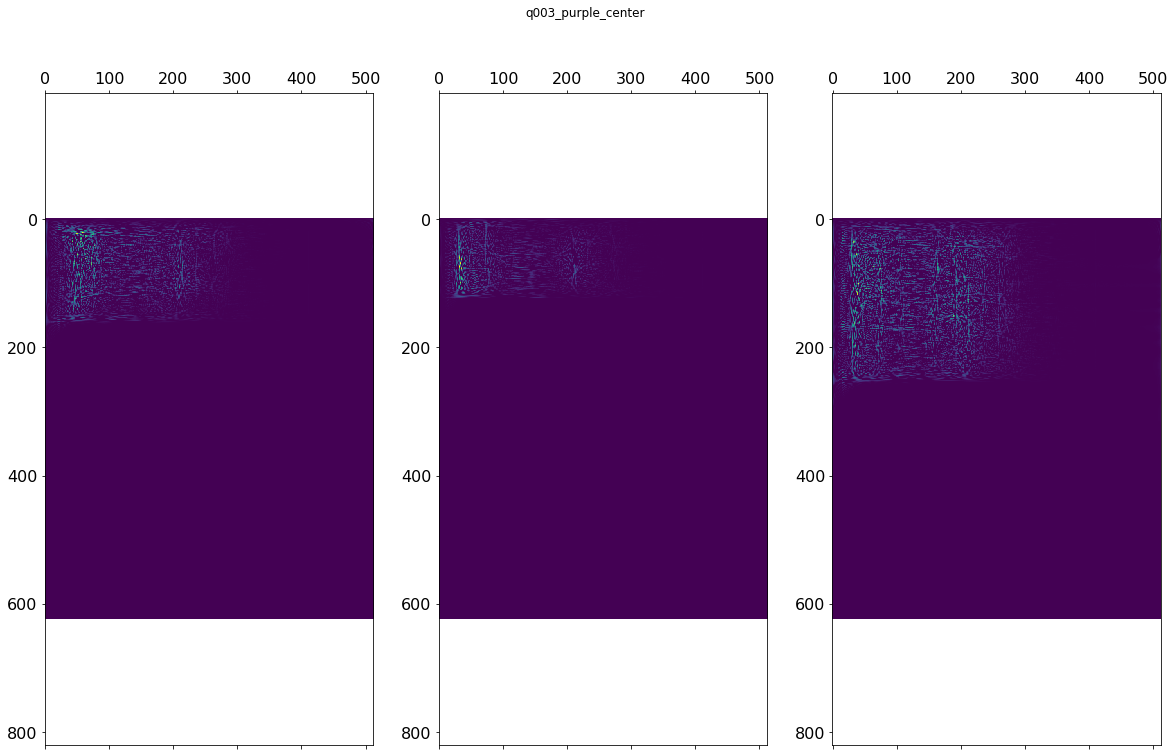

In [38]:
#quench 3, purple, center

q003_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q003_purple_center.append(i)
        
print("q003_purple_center")        
print(q003_purple_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_purple_center')
plt.show()

q003_purple_right
[3, 5, 9, 11, 16, 33, 35, 36, 42, 46, 52, 54, 55, 60, 79, 83, 85, 87, 88, 92, 97, 98, 100, 114, 120, 135, 145, 151, 165, 166, 169, 170, 186, 187, 190, 191, 193, 201, 204, 215, 218, 219, 230, 234, 236, 240, 259, 260, 261, 268, 289, 302, 306, 323, 333, 340, 342, 346, 370, 382, 404, 413, 417, 423, 445, 447, 449, 457, 462, 489, 491, 495, 497, 499, 525, 533, 538, 543, 546, 551, 552, 558, 581, 585, 588, 594, 601, 604, 610, 611, 617, 619, 621, 626, 634, 635, 640, 650, 654, 655, 676, 677, 687, 689, 691, 708, 712, 714, 717, 722, 725, 727, 731, 735, 736, 738, 743, 747, 753, 755, 761, 763, 775, 798, 802, 806, 815, 816, 821, 825, 826, 833, 841, 842, 843, 855, 867, 868, 869, 875, 883, 886, 890, 894, 899, 914, 922, 923, 925, 928, 930, 950, 958, 970, 998, 1008, 1021, 1023, 1025, 1031, 1035, 1038, 1043, 1045, 1047, 1053, 1077, 1084, 1089, 1104, 1123, 1125, 1132, 1141, 1143, 1155, 1171, 1175, 1176, 1195, 1196, 1215, 1219, 1227, 1236, 1240, 1245, 1251, 1256, 1260, 1273, 1274, 1277, 128

<Figure size 2160x720 with 0 Axes>

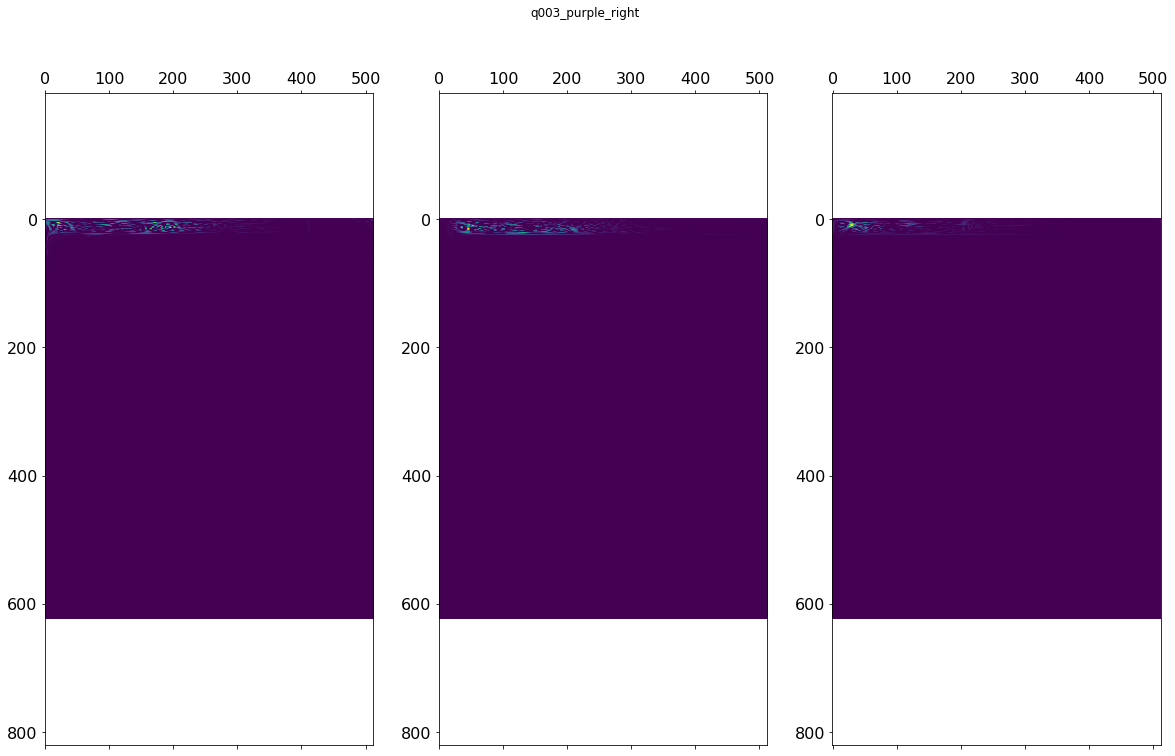

In [39]:
#quench 3, purple, right

q003_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q003_purple_right.append(i)
        
print("q003_purple_right")        
print(q003_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q003_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q003_purple_right')
plt.show()


q103_green_left
[3204, 3272, 3311, 3321, 3338, 3352, 3365, 3377, 3393, 3949, 4015, 4033, 4059, 4081, 4088, 4117, 4152, 4256, 4262, 4264, 4290, 4292, 4309, 4316, 4327, 4354, 4363, 4369, 4377, 4391, 4409, 4414, 4425, 4429, 4437, 4440, 4455, 4487, 4514, 4531, 4544, 4562, 4572, 4576, 4633, 4640, 4654, 4672, 4673, 4674, 4688, 4700, 4723, 4725, 4730, 4749, 4756, 4772, 4774, 4778, 4801, 4822, 4834, 4839, 4841, 4850, 4859, 4863, 4882, 4888, 4895, 4902, 4905, 4927, 4934, 4939, 4943, 4947, 4959, 4984, 4988, 5004, 5035, 5038, 5078, 5082, 5090, 5096, 5108, 5116, 5142, 5145, 5151, 5154, 5156, 5168, 5181, 5185, 5196, 5197, 5199, 5208, 5225, 5236, 5248, 5254, 5263, 5274, 5285, 5303, 5313, 5317, 5320, 5329, 5333, 5347, 5355, 5360, 5380, 5392, 5398, 5406, 5407, 5412, 5417, 5425, 5439, 5440, 5461, 5468, 5470, 5474, 5476, 5492, 5503, 5507, 5518, 5519, 5528, 5536, 5542, 5546, 5550, 5555, 5563, 5566, 5567, 5569, 5577, 5582, 5591, 5605, 5616, 5620, 5626, 5630, 5634, 5642, 5644, 5651, 5653, 5658, 5668, 5672,

<Figure size 2160x720 with 0 Axes>

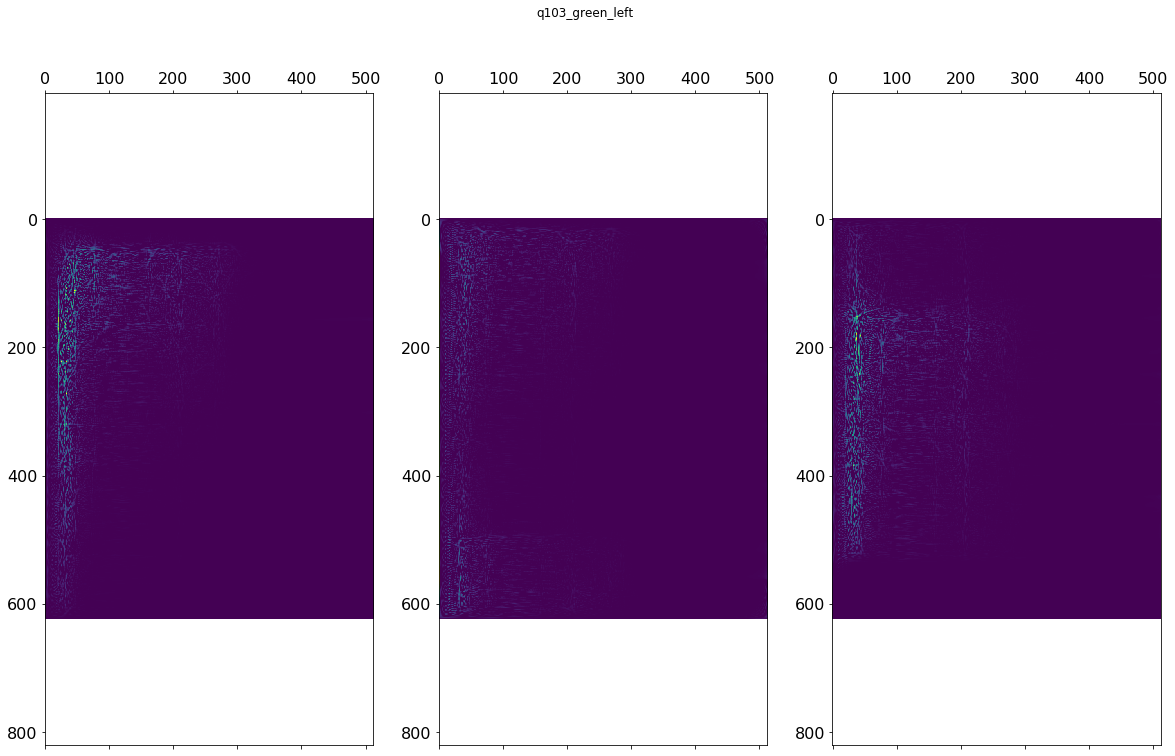

In [40]:
#quench 103, green, left

q103_green_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='green'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_green_left.append(i)
        
print("q103_green_left")        
print(q103_green_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_green_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q103_green_left')
plt.show()

In [19]:
#quench 103, green, center

#none


In [20]:
#quench 103, green, right

#none


q103_purple_left
[3168, 3200, 3207, 3257, 3276, 3277, 3316, 3358, 3361, 3384, 3429, 3507, 3683, 3686, 3721, 3745, 3793, 3803, 3818, 3826, 3848, 3866, 3873, 3915, 3917, 3918, 3921, 3956, 3958, 3959, 3981, 3984, 3986, 4012, 4029, 4034, 4041, 4054, 4075, 4077, 4083, 4100, 4104, 4116, 4119, 4128, 4130, 4139, 4147, 4161, 4208, 4214, 4217, 4227, 4235, 4237, 4249, 4266, 4278, 4294, 4297, 4304, 4318, 4331, 4338, 4339, 4342, 4353, 4358, 4372, 4379, 4397, 4405, 4410, 4479, 4494, 4506, 4513, 4515, 4534, 4535, 4542, 4581, 4600, 4607, 4617, 4622, 4643, 4646, 4649, 4652, 4662, 4671, 4682, 4693, 4695, 4697, 4704, 4719, 4731, 4734, 4742, 4746, 4747, 4758, 4759, 4817, 4864, 4867, 4879, 4897, 4961, 4968, 4978, 4979, 4985, 4997, 5028, 5040, 5044, 5060, 5072, 5077, 5093, 5095, 5102, 5122, 5127, 5161, 5171, 5182, 5218, 5220, 5241, 5245, 5247, 5253, 5255, 5264, 5279, 5291, 5300, 5306, 5312, 5328, 5331, 5339, 5357, 5426, 5463, 5471, 5496, 5514, 5527, 5532, 5537, 5541, 5559, 5580, 5583, 5587, 5599, 5645, 5652

<Figure size 2160x720 with 0 Axes>

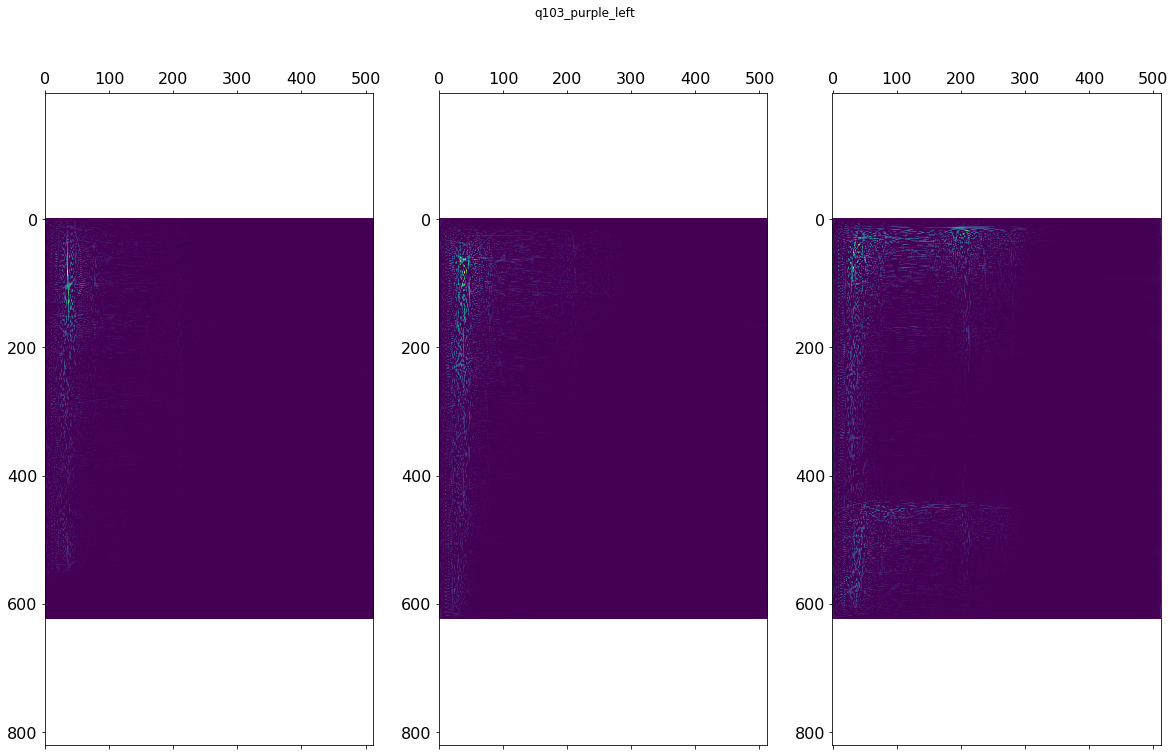

In [41]:
#quench 103, purple, left

q103_purple_left = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (leftvxmin<pca0<leftvxmax) and (leftvymin<pca1<leftvymax):
            q103_purple_left.append(i)
        
print("q103_purple_left")        
print(q103_purple_left)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_left, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q103_purple_left')
plt.show()

q103_purple_center
[6637, 6639, 6641, 6644, 6647, 6648, 6652, 6655, 6662, 6674, 6681, 6688, 6698, 6702, 6703, 6718, 6719, 6722, 6728, 6748, 6749, 6753, 6756, 6759, 6761, 6774, 6783, 6803, 6815, 6818, 6826, 6831, 6835, 6837, 6839, 6847, 6856, 6859, 6868, 6873, 6876, 6888, 6900, 6937, 6981, 6996, 6999, 7009, 7016, 7022, 7028, 7035, 7036, 7053, 7061, 7062, 7109, 7116, 7120, 7135, 7143, 7148, 7156, 7157, 7160, 7169, 7180, 7185, 7190, 7203, 7221, 7231, 7239, 7246, 7249, 7257, 7265, 7267, 7278, 7280, 7299, 7304, 7309, 7316, 7326, 7328, 7331, 7342, 7345, 7369, 7376, 7384, 7387, 7419, 7420, 7423, 7427, 7429, 7431, 7446, 7451, 7456, 7459, 7461, 7465, 7472, 7474, 7476, 7477, 7482, 7486, 7501, 7509, 7511, 7519, 7528, 7532, 7539, 7543, 7547, 7548, 7552, 7555, 7556, 7560, 7562, 7563, 7574, 7575, 7583, 7586, 7587, 7588, 7596, 7599, 7605, 7607, 7608, 7618, 7626, 7629, 7634, 7636, 7637, 7641, 7642, 7646, 7651, 7663, 7665, 7667, 7673, 7677, 7678, 7679, 7681, 7690, 7692, 7696, 7700, 7705, 7708, 7718, 77

<Figure size 2160x720 with 0 Axes>

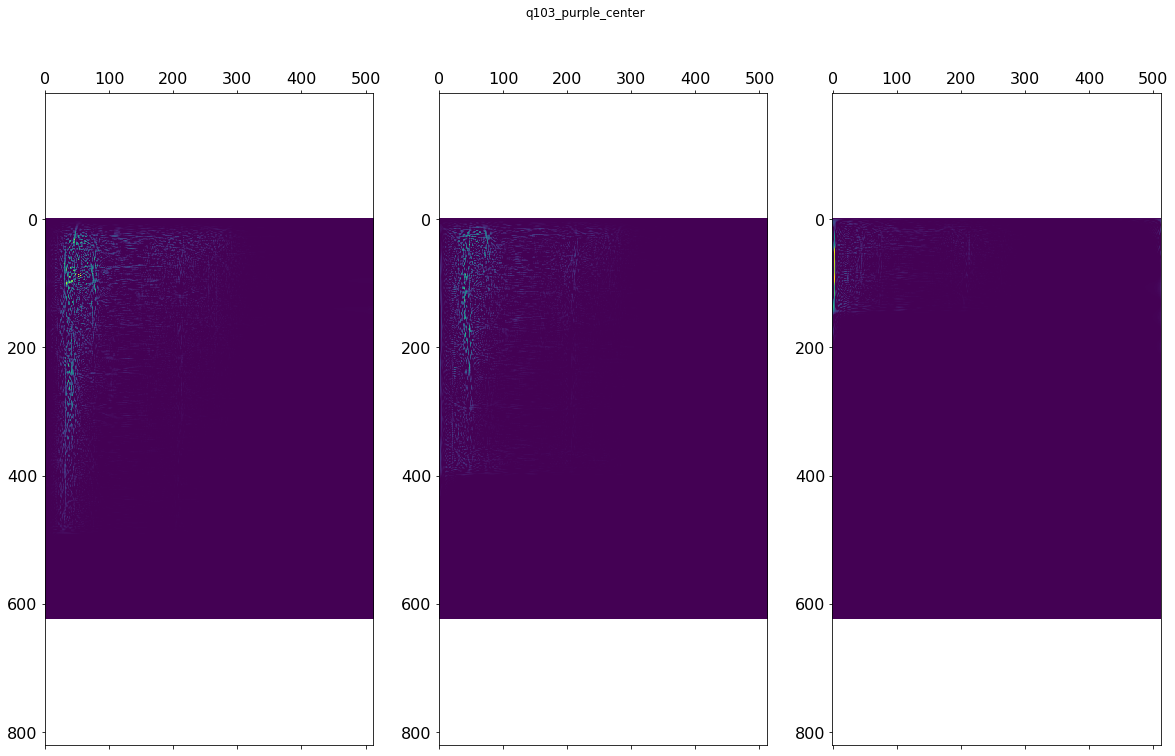

In [42]:
#quench 103, purple, center

q103_purple_center = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (centervxmin<pca0<centervxmax) and (centervymin<pca1<centervymax):
            q103_purple_center.append(i)
        
print("q103_purple_center")        
print(q103_purple_center)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_center, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q103_purple_center')
plt.show()


q103_purple_right
[6650, 6654, 6670, 6701, 6715, 6752, 6767, 6769, 6800, 6887, 6889, 6898, 6916, 6920, 7027, 7033, 7063, 7108, 7222, 7285, 7289, 7318, 7421, 7428, 7439, 7452, 7524, 7529, 7564, 7569, 7619, 7652, 7707, 7709, 7747, 7756, 7763, 7777, 7811, 7882, 7921, 7949, 7955, 7995, 7997, 8024, 8029, 8038, 8088, 8135, 8152, 8158, 8203, 8208, 8211, 8226, 8236, 8287, 8316, 8319, 8353, 8364, 8371, 8430, 8434, 8445, 8457, 8491, 8496, 8505, 8510, 8515, 8523, 8531, 8544, 8588, 8597, 8607, 8608, 8654, 8676, 8768, 8777, 8780, 8832, 8847, 8864, 8881, 8926, 8948, 8959, 8994, 9011, 9019, 9027, 9035, 9050, 9127, 9134, 9177, 9183, 9187, 9202, 9218, 9279, 9326, 9356, 9363, 9388, 9437, 9460, 9490, 9588, 9589, 9693, 9736, 9746, 9757, 9759, 9777]
These are the random images we chose to display:
[9777 6650 8588]


<Figure size 2160x720 with 0 Axes>

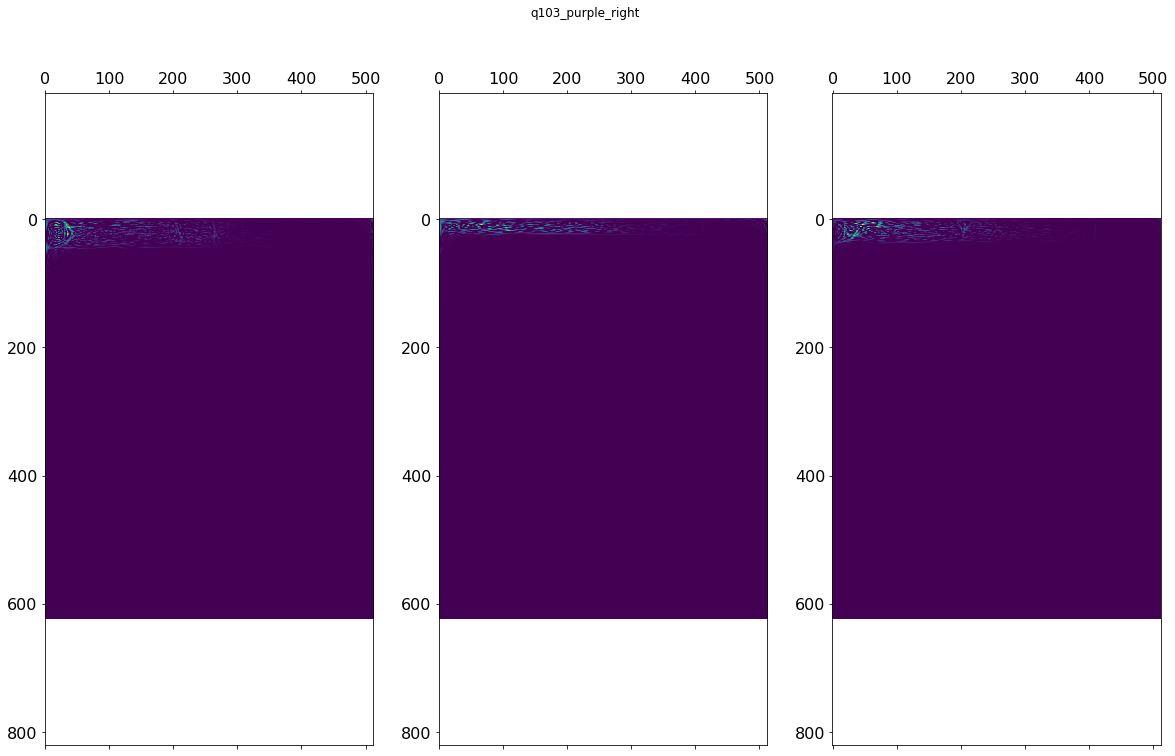

In [43]:
#quench 103, purple, right

q103_purple_right = list()
#find points in the right pca space
for i in range(qall_data.shape[0]):
    if (i > q103_data.shape[0]) and (color_label[i]=='purple'):
        pca0 = img_pca[i,0]
        pca1 = img_pca[i,1]
        if (rightvxmin<pca0<rightvxmax) and (rightvymin<pca1<rightvymax):
            q103_purple_right.append(i)
        
print("q103_purple_right")        
print(q103_purple_right)        

plt.figure(figsize=(30, 10))

#randomly pick three images to show (not the first three)
pick_3 = np.random.choice(q103_purple_right, num_images)

print("These are the random images we chose to display:")
print(pick_3)

show_images = qall_data[pick_3,:,:]

fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 12))
ax_l.matshow(show_images[0,:,:])
ax_l.axis('equal')
ax_c.matshow(show_images[1,:,:])
ax_c.axis('equal')
ax_r.matshow(show_images[2,:,:])
ax_r.axis('equal')
fig.suptitle('q103_purple_right')
plt.show()
